In [7]:
# import json
# import pandas as pd
# import os
# from os import listdir, getcwd, chdir
# from os.path import isfile, join
# import csv
# from data_separation import read_feature, filter_feature, remove_nans_feature, put_together

In [2]:
json_path = '/Users/khanhha/mpt-statistical-testing/MPTData/15_models_10_percent.json'
msd_path = '/Users/khanhha/mpt-statistical-testing/MPTData/msd_data'
feature_path = '/Users/khanhha/mpt-statistical-testing/MPTData/feature_data'

In [111]:
# # Load a .csv file of interest from folder
# def csv_from_folder(n, folder_path):
#     # n is the order of file of interest
#     files = os.listdir(folder_path)
#     # Filter .csv files
#     csv_files = [file for file in files if file.endswith('.csv')]
    
#     # Ensure the directory has at least n CSV files
#     if len(csv_files) >= n:
#         # Get the nth CSV file
#         csv_file_name = csv_files[n - 1]
#         csv_file_path = os.path.join(folder_path, csv_file_name)
        
#         # Read the CSV file
#         with open(csv_file_path, 'r') as csv_file:
#             csv_data = pd.read_csv(csv_file)
#     else:
#         print(f"There are less than {n} CSV files in the directory.")
#     return csv_file_name, csv_data

## Data Quality Sort

In [113]:
# with open(json_path) as json_file:
#     json_data = json.load(json_file)

In [22]:
# feature_list = [
#     'alpha', # Fitted anomalous diffusion alpha exponenet
#     'D_fit', # Fitted anomalous diffusion coefficient
#     'kurtosis', # Kurtosis of track
#     'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
#     'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
#     'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
#     'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
#     'elongation', # Est. of amount of extension of trajectory from centroid
#     'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
#     'fractal_dim', # Measure of how complicated a self similar figure is
#     'trappedness', # Probability that a particle with Deff is trapped in a region
#     'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
#     'straightness', # Ratio of net displacement to the sum of squared step lengths
#     'MSD_ratio', # MSD ratio of the track
# #     'frames', # Number of frames the track spans
#     'Deff1', # Effective diffusion coefficient at 0.33 s
#     'Deff2', # Effective diffusion coefficient at 3.3 s
#     'Mean alpha', 
#     'Mean D_fit', 
#     'Mean kurtosis', 
#     'Mean asymmetry1', 
#     'Mean asymmetry2',
#     'Mean asymmetry3', 
#     'Mean AR',
#     'Mean elongation', 
#     'Mean boundedness',
#     'Mean fractal_dim', 
#     'Mean trappedness', 
#     'Mean efficiency',
#     'Mean straightness', 
#     'Mean MSD_ratio', 
#     'Mean Deff1', 
#     'Mean Deff2',
#     ]

In [23]:
# feature_files = [f for f in listdir(feature_path) if isfile(join(feature_path, f)) and '.csv' in f and 'P' in f]

In [24]:
# data_quality = put_together(
#     json_data,
#     feature_list,
#     feature_path,
#     feature_files
# )

In [108]:
# data_quality['features_P14_40nm_s2_v1']

## Importing Data

### Load MSD Data
Input the video code of interest.

In [3]:
def video_quality_map(feature_path, msd_path, json_path, vid_code):
    ''' Plot trajectories of particles in 1 video:
    INPUTs:
        'feature_path' - path to directory containing feature data files
        'msd_path' - path to directory containing msd files
        'json_path' - path to json file
        'vid_code' - code name of the video of interest (ex: 'P14_40nm_s1_v3')
    '''
    
    from data_separation import read_feature, filter_feature, remove_nans_feature, put_together    
    from os import listdir, getcwd, chdir
    from os.path import isfile, join
    import json
    import pandas as pd
    # Sort the data into categories: high, low, medium
    
    with open(json_path) as json_file:
        json_data = json.load(json_file)
    
    feature_list = [
    'alpha', # Fitted anomalous diffusion alpha exponenet
    'D_fit', # Fitted anomalous diffusion coefficient
    'kurtosis', # Kurtosis of track
    'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
    'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
    'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
    'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
    'elongation', # Est. of amount of extension of trajectory from centroid
    'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
    'fractal_dim', # Measure of how complicated a self similar figure is
    'trappedness', # Probability that a particle with Deff is trapped in a region
    'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
    'straightness', # Ratio of net displacement to the sum of squared step lengths
    'MSD_ratio', # MSD ratio of the track
#     'frames', # Number of frames the track spans
    'Deff1', # Effective diffusion coefficient at 0.33 s
    'Deff2', # Effective diffusion coefficient at 3.3 s
    'Mean alpha', 
    'Mean D_fit', 
    'Mean kurtosis', 
    'Mean asymmetry1', 
    'Mean asymmetry2',
    'Mean asymmetry3', 
    'Mean AR',
    'Mean elongation', 
    'Mean boundedness',
    'Mean fractal_dim', 
    'Mean trappedness', 
    'Mean efficiency',
    'Mean straightness', 
    'Mean MSD_ratio', 
    'Mean Deff1', 
    'Mean Deff2',
    ]

    feature_files = [f for f in listdir(feature_path) if isfile(join(feature_path, f)) and '.csv' in f and 'P' in f]

    # Apply put_together:
    data_quality = put_together(json_data,feature_list,feature_path,feature_files)
    feature1 = data_quality['features_' + vid_code]

    # Import msd file:
    msd_files = [f for f in listdir(msd_path) if isfile(join(msd_path, f)) and '.csv' in f and 'P' in f]
    msd_data = read_feature(msd_path, msd_files)
    msd1 = msd_data['msd_' + vid_code]

    # Color coded the X Y based on quality sort
    # green-high, yellow-medium, red-low, purple-NaN
    
    # Merge feature quality and msd into 1 table
    feature2 = feature1[['Track_ID','Category']]
    df = pd.merge(msd1, feature2, on='Track_ID', how='left')

    # Separate data based on Category
    low_Y = df[df['Category'] == 'low']
    med_Y = df[df['Category'] == 'medium']
    high_Y = df[df['Category'] == 'high']
    null_Y = df[df['Category'] == None]
    
    # Plot
    import matplotlib.pyplot as plt
    plt.figure(figsize = (10,10))
        
    plt.plot(low_Y['X'], low_Y['Y'], color='red', label='Low')
    plt.plot(med_Y['X'], med_Y['Y'], color='yellow', label='Medium')
    plt.plot(high_Y['X'], high_Y['Y'], color='green', label='High')
    plt.plot(null_Y['X'], null_Y['Y'], color='grey', label='Unclassified')
    
    plt.legend()
    plt.title('Trajectories of Particles in Video ' + vid_code)
    plt.show()

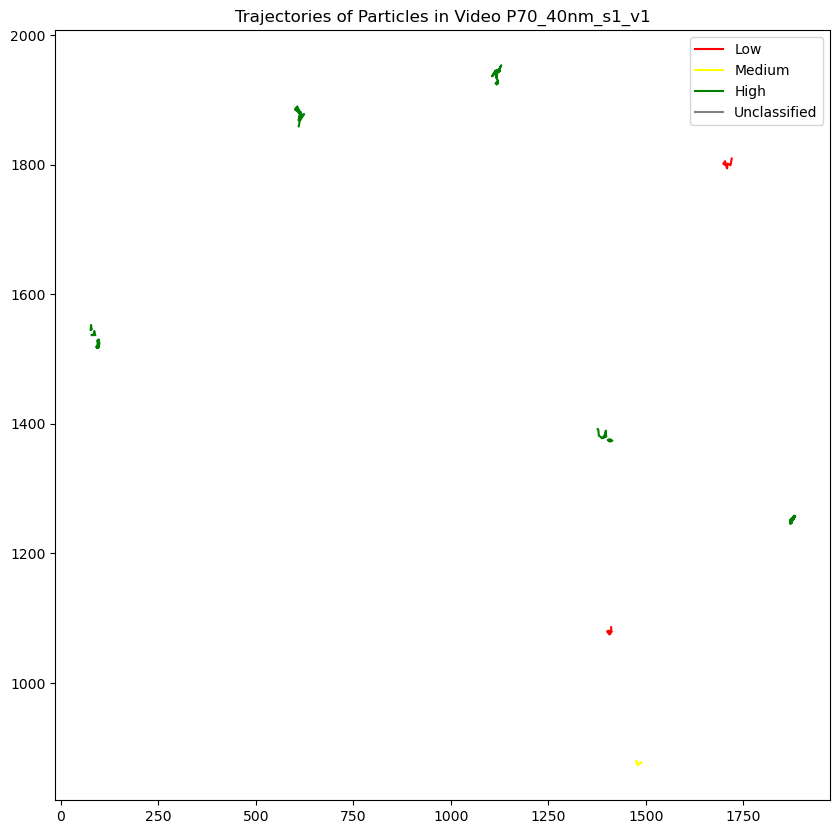

In [2]:
from video_quality_map import video_quality_map
json_path = '/Users/khanhha/mpt-statistical-testing/MPTData/15_models_10_percent.json'
msd_path = '/Users/khanhha/mpt-statistical-testing/MPTData/msd_data'
feature_path = '/Users/khanhha/mpt-statistical-testing/MPTData/feature_data'

vid_code = 'P70_40nm_s1_v1'
video_quality_map(feature_path, msd_path, json_path, vid_code)

## Plot Test Below

In [98]:
feature1 = data_quality['features_' + vid_code]

In [99]:
msd_files = [f for f in listdir(msd_path) if isfile(join(msd_path, f)) and '.csv' in f and 'P' in f]
msd_data = read_feature(msd_path, msd_files)

In [100]:
msd1 = msd_data['msd_' + vid_code]

In [103]:
# Color coded the X Y based on quality sort
# green-high, yellow-medium, red-low, purple-NaN

# Merge feature quality and msd into 1 table
feature2 = feature1[['Track_ID','Category']]
df = pd.merge(msd1, feature2, on='Track_ID', how='left')

In [105]:
low_Y = df[df['Category'] == 'low']
med_Y = df[df['Category'] == 'medium']
high_Y = df[df['Category'] == 'high']
null_Y = df[df['Category'] == None]

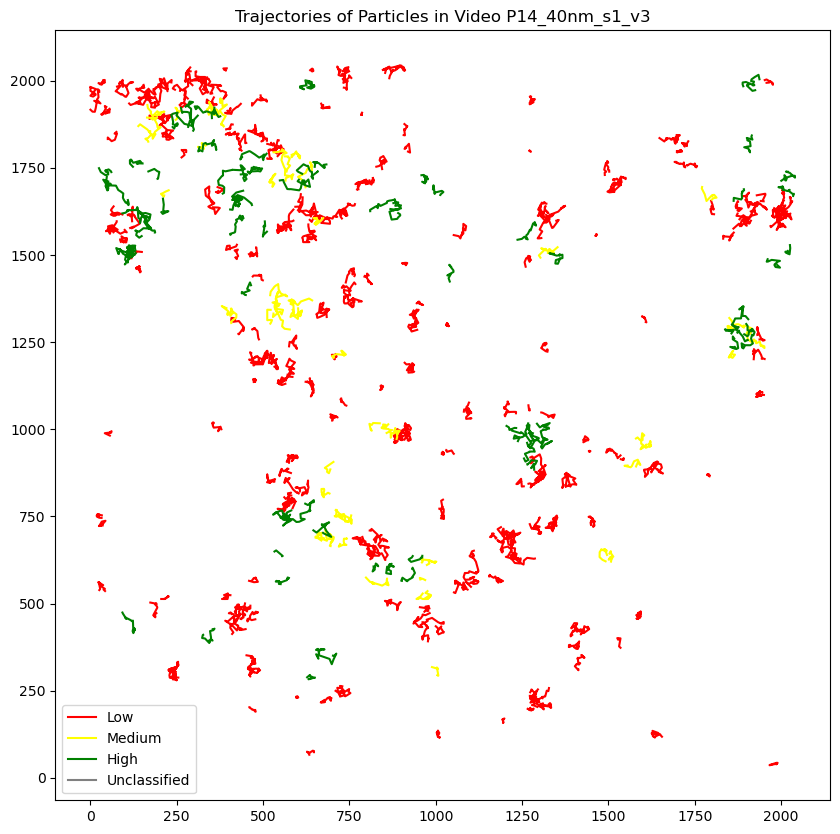

In [106]:
# Plot
import matplotlib.pyplot as plt

# Plot X and Y columns
plt.figure(figsize = (10,10))
    
plt.plot(low_Y['X'], low_Y['Y'], color='red', label='Low')
plt.plot(med_Y['X'], med_Y['Y'], color='yellow', label='Medium')
plt.plot(high_Y['X'], high_Y['Y'], color='green', label='High')
plt.plot(null_Y['X'], null_Y['Y'], color='grey', label='Unclassified')

plt.legend()
plt.title('Trajectories of Particles in Video ' + vid_code)
plt.show()

### Load Feature Data

In [ ]:
feature1 = csv_from_folder(1,feature_folder)[1]
csv_from_folder(1,feature_folder)

## MSD vs Feature Data

In [ ]:
# pd.DataFrame(msd1)

In [ ]:
# pd.DataFrame(feature1)

## Sort Data Files

In [ ]:
import glob
import shutil

In [ ]:
# P14_path = glob.glob('/Users/khanhha/mpt-statistical-testing/MPTData/mpt/*P14*.csv')
# os.makedirs('P14')


In [118]:
# # Directory where the files are located
# directory = '/Users/khanhha/mpt-statistical-testing/MPTData/mpt/'

# # Create a dictionary to store files based on their tails
# file_pairs = {}

# # Iterate over each file in the directory
# for filename in os.listdir(directory):
#     if filename.startswith("features") and filename.endswith('.csv'):
#         # Extract the tail after 'features' and before '.csv'
#         tail = filename.split('_', 1)[1].split('.')[0]
#         # Store filename in the dictionary
#         file_pairs.setdefault(tail, []).append(filename)
        
#     elif filename.startswith('msd') and filename.endswith('.csv'):
#         # Extract the tail after 'msd' and before '.csv'
#         tail = filename.split('_', 1)[1].split('.')[0]
#         # Store the filename in the dictionary
#         file_pairs.setdefault(tail, []).append(filename)

# # Iterate over the pairs and create folders if they have more than 1 file
# for tail, filenames in file_pairs.items():
#     if len(filenames) >=2:
#         folder_name = os.path.join(directory, tail)
#         os.makedirs(folder_name, exist_ok = True)
#         for filename in filenames:
#             file_path = os.path.join(directory, filename)
#             destination_path = os.path.join(folder_name, filename)
#             shutil.move(file_path, destination_path)


In [10]:
df_feature = pd.read_csv('MPTData/mpt/P14_40nm_s1_v2/features_P14_40nm_s1_v2.csv')
df_msd = pd.read_csv('MPTData/mpt/P14_40nm_s1_v2/msd_P14_40nm_s1_v2.csv')

In [11]:
df_msd.columns

Index(['Unnamed: 0', 'Frame', 'Track_ID', 'X', 'Y', 'MSDs', 'Gauss', 'Quality',
       'SN_Ratio', 'Mean_Intensity'],
      dtype='object')

In [12]:
# df_feature[['alpha','Mean alpha']]
df_feature.columns

Index(['Unnamed: 0', 'Track_ID', 'alpha', 'D_fit', 'kurtosis', 'asymmetry1',
       'asymmetry2', 'asymmetry3', 'AR', 'elongation', 'boundedness',
       'fractal_dim', 'trappedness', 'efficiency', 'straightness', 'MSD_ratio',
       'frames', 'X', 'Y', 'Quality', 'Mean_Intensity', 'SN_Ratio', 'Deff1',
       'Deff2', 'angle_mean', 'angle_mag_mean', 'angle_var', 'convex_hull',
       'convex_hull_norm', 'dist_tot', 'dist_net', 'progression', 'Mean alpha',
       'Std alpha', 'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames

In [63]:
df_json = pd.DataFrame(df_json)
df_json.shape

(1007, 1)

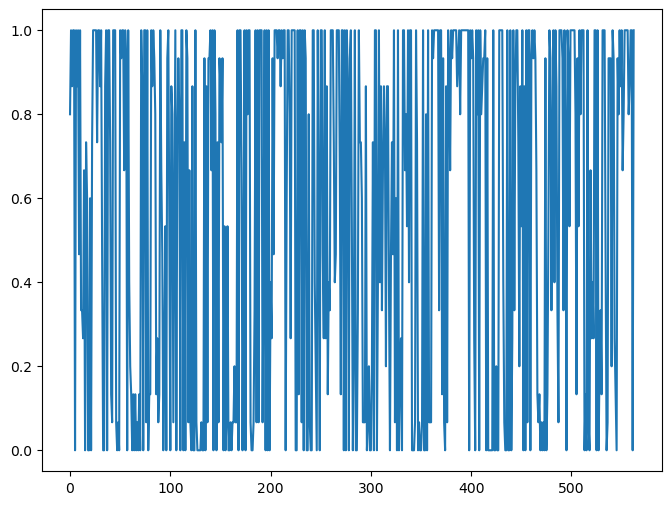

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

msd_of_interest = 'MSDs'
feature_of_interest = 'elongation'

# Assuming df_msd and df_feature are your MSD data and feature data DataFrames, respectively
# Extract the relevant columns
msd_data = df_msd[['Track_ID', msd_of_interest]]
feature_data = df_feature[['Track_ID', feature_of_interest]]

# Merge the two datasets on Track_ID
merged_data = pd.merge(msd_data, feature_data, on='Track_ID')

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.plot(df_json)
plt.show()


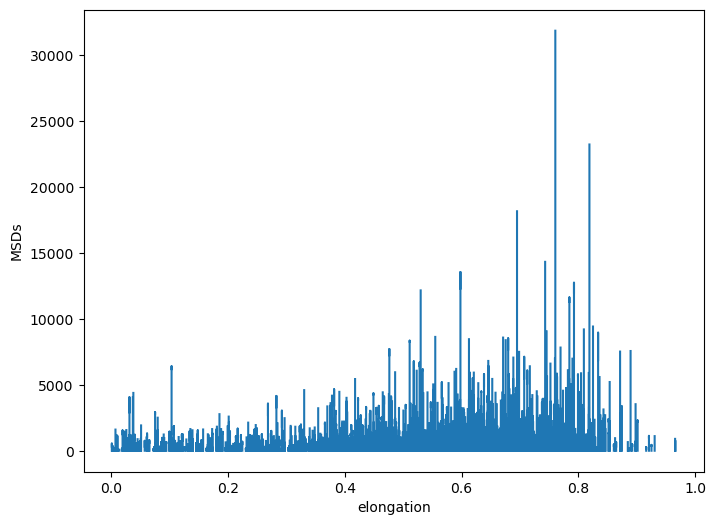

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

msd_of_interest = 'MSDs'
feature_of_interest = 'elongation'

# Assuming df_msd and df_feature are your MSD data and feature data DataFrames, respectively
# Extract the relevant columns
msd_data = df_msd[['Track_ID', msd_of_interest]]
feature_data = df_feature[['Track_ID', feature_of_interest]]

# Merge the two datasets on Track_ID
merged_data = pd.merge(msd_data, feature_data, on='Track_ID')

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.plot(merged_data[feature_of_interest], merged_data[msd_of_interest])
plt.ylabel(msd_of_interest)
plt.xlabel(feature_of_interest)
# plt.title('Relationship between ' + msd_of_interest + ' and ' + feature_of_interest)
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from os import listdir, getcwd, chdir
# from os.path import isfile, join
# import json
# import os

# def read_feature(feature_data_path, feature_files):
#     '''
#     Read feature data using original feature_data_path and selected feature_files. 
#     rename each file using the names in feature_files without .csv
#     put file name and feature data in a dictionary named "feature_data"
#     '''

#     feature_data = {}
#     for item in feature_files:
#         file_path = os.path.join(feature_data_path, item)
#         #rename
#         file_name = os.path.splitext(item)[0]
#         df = pd.read_csv(file_path)
#         feature_data[file_name] = df
#     return feature_data


# def filter_feature(feature_list, feature_data_path, feature_files):
#     '''
#     Filtered feature data by selected list
#     put filtered feature data into a dictionary named "feature_data_filtered"
#     '''

#     feature_data = read_feature(feature_data_path, feature_files)
#     feature_data_filtered = {}
#     for key in feature_data:
#         feature_data_filtered[key] = feature_data[key][feature_list + ['Track_ID', 'X', 'Y', 'frames']]
#     return feature_data_filtered


# def remove_nans_feature(feature_list, feature_data_path, feature_files):
#     '''
#     Remove nans in filtered feature data
#     put nans removed feature data into a dictionary named "feature_data_removed_nans"
#     '''

#     feature_data_filtered = filter_feature(feature_list, feature_data_path, feature_files)
#     feature_data_removed_nans = {}
#     for key in feature_data_filtered:
#         feature_data_removed_nans[key] = feature_data_filtered[key][~feature_data_filtered[key][list(set(feature_list) - set(['Deff2', 'Mean Deff2']))].isin([np.nan, np.inf, -np.inf]).any(1)]
#         feature_data_removed_nans[key] = feature_data_removed_nans[key].reset_index(drop=True)
#     return feature_data_removed_nans


# def read_json(json_data, feature_list, feature_data_path, feature_files):
#     '''
#     Read json data in the order of feature_data_removed_nans
#     put json data into a dictionary named "json_data_new"
#     '''

#     feature_data_removed_nans = remove_nans_feature(feature_list, feature_data_path, feature_files)
#     quality_data = {}
#     for key in feature_data_removed_nans:
#         quality_data[key] = json_data['/'+ key + '.csv']
#     return quality_data

# def put_together(json_data, feature_list, feature_data_path, feature_files):
#     '''
#     Combine removed nans data and quality data together
#     seperate the quality data in removed nans data using "catagory"
#     put combined data into a dictionary named "quality_feature"
    
#     In the quality_feature, (-0.001, 0.333] is low, (0.333, 0.667] is medium, and (0.667, 1.0] is high
#     '''
#     feature_data_removed_nans = remove_nans_feature(feature_list, feature_data_path, feature_files)
#     quality_data = read_json(json_data, feature_list, feature_data_path, feature_files)
#     category_labels = ['low', 'medium', 'high']

#     quality_feature = {}

#     for key in feature_data_removed_nans:
#         feature_data_removed_nans[key]['Quality'] = quality_data[key]
#         feature_data_removed_nans[key]['Category'] = pd.cut(feature_data_removed_nans[key]['Quality'], bins=3, labels=category_labels)
#         quality_feature[key] = feature_data_removed_nans[key]
#     return quality_feature


In [14]:
from data_separation import put_together

In [ ]:
# def read_feature(feature_data_path, feature_files):
#     return feature_data

# def filter_feature(feature_list, feature_data_path, feature_files):
#     return feature_data_filtered

# def remove_nans_feature(feature_list, feature_data_path, feature_files):
#     return feature_data_removed_nans

# def read_json(json_data, feature_list, feature_data_path, feature_files):
#     return quality_data

# def put_together(json_data, feature_list, feature_data_path, feature_files):
#     return quality_feature


quality_feature = put_together(df_json, feature_list, feature_data_path, feature_files)